In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
from geometry import PupilGeometry

In [4]:
pupil = PupilGeometry(shear=True, shear_angle=30, shear_coeffs=(1.1, 0.9))

[[1.05       0.08660254]
 [0.08660254 0.95      ]]


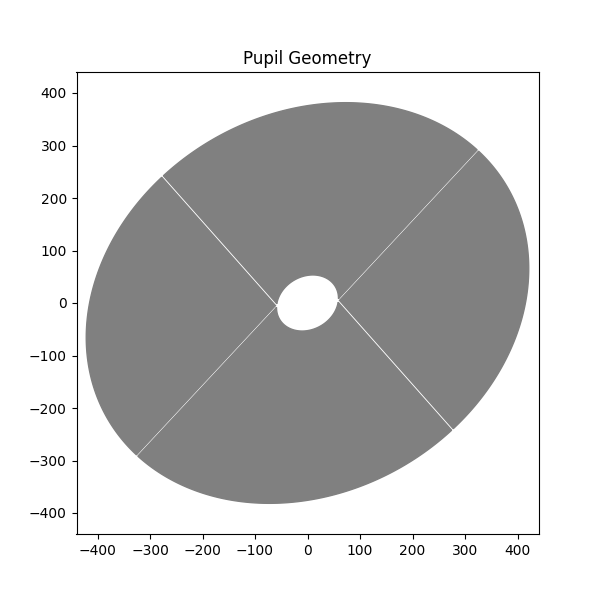

In [5]:
pupil.plot_pupil()


In [6]:
x, y, weights = pupil.create_pixel_weights(num_pixels=400)

[[1.05       0.08660254]
 [0.08660254 0.95      ]]


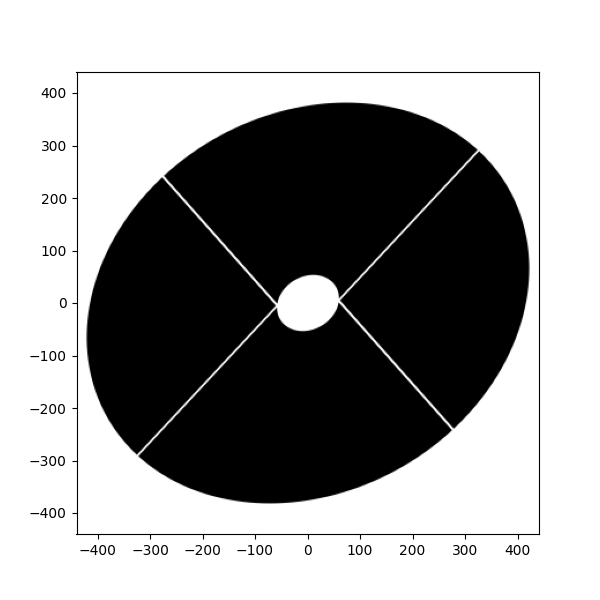

In [7]:
fig, ax = plt.subplots(figsize=(6, 6))
import numpy as np
plt.imshow(weights.T, cmap='gray_r', extent=(x.min(), x.max(), y.min(), y.max()), origin='lower')
#plt.colorbar()

In [8]:
from astropy.io import fits
hdu = fits.PrimaryHDU(weights)
hdu.header['XMIN'] = x.min()
hdu.header['XMAX'] = x.max()
hdu.header['YMIN'] = y.min()
hdu.header['YMAX'] = y.max()
hdul = fits.HDUList([hdu])
hdul.writeto('gray_pupil.fits',overwrite=True)


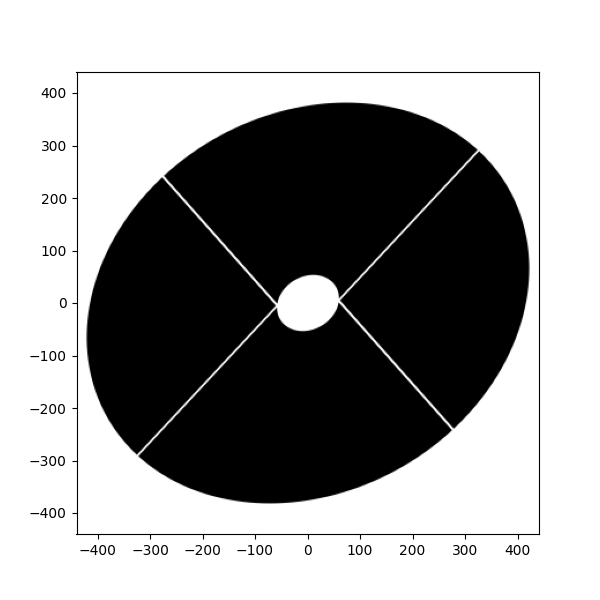

In [9]:
data,hdr = fits.getdata('gray_pupil.fits',header=True)
xmin = hdr['XMIN']
xmax = hdr['XMAX']
ymin = hdr['YMIN']
ymax = hdr['YMAX']
fig, ax = plt.subplots(figsize=(6, 6))
plt.imshow(data.T, cmap='gray_r', extent=(xmin, xmax, ymin, ymax), origin='lower')

In [11]:
pupil.get_area()/10000 # in square meters

48.70254874205577

In [13]:
(8*1.1)**2

77.44000000000001

In [15]:
weights.mean()

np.float64(0.6289068794170428)

In [16]:
pupil.get_area()/10000 / (8*1.1)**2

0.6289068794170424